# Cognifyz Data Analysys LEVEL_1 (Shantanu Garain)

## Importing Libraries 

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import folium
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset 

In [110]:
df = pd.read_csv('Dataset.csv')

## Size of our data 

In [111]:
df.size

200571

## Shape of our data 

In [112]:
df.shape

(9551, 21)

## Looking for Columns and no. of columns

In [113]:
# Columns in our dataset
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [114]:
# Number of columns in our dataset
print(f"No of columns in the dataset is:\n{df.shape[1]}")

No of columns in the dataset is:
21


# Looking for top 5 column of our dataset

In [115]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Some important information about the columns of our data 

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Some statistical information about the data:¶

In [117]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# DATA PREPROCESSING AND DATA CLEANING:

## Null values in each column:

In [118]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

## Check duplicate and remove them 

In [119]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [120]:
df.size

200571

# EXPLORATORY DATA ANALYSIS

## cuisine count 

In [121]:
cuisines_count = df['Cuisines'].value_counts()
cuisines_count

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [122]:
# Sorted Cuisines
sorted_cuisines = cuisines_count.sort_values(ascending=False)
sorted_cuisines

Cuisines
North Indian                                     936
North Indian, Chinese                            511
Chinese                                          354
Fast Food                                        354
North Indian, Mughlai                            334
                                                ... 
Cafe, Mexican, Italian, North Indian, Chinese      1
Continental, Mexican                               1
Continental, Chinese, Italian, Cafe                1
Hyderabadi, Biryani                                1
Italian, World Cuisine                             1
Name: count, Length: 1825, dtype: int64

# LEVEL_1 Task_1 (Top Cuisines)

## 1. Top three most common cusines in the dataset

In [123]:
top_three = sorted_cuisines.head(3)

print("Top three most common cuisines are: \n\n",top_three)


Top three most common cuisines are: 

 Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64


In [124]:
total_restaurents = len(df['Restaurant ID'].value_counts())
total_restaurents

9551

## 2. Percentage calculate of restaurents that serve each of the top cuisines

In [125]:
# percentage calculation
percentage = (top_three / total_restaurents) * 100
print("Percentage calculation of Restaurents that Serve each of the top cuisines\n", percentage)

Percentage calculation of Restaurents that Serve each of the top cuisines
 Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64


# LEVEL_1 Task_2 (City Analysis)

## 1. Identify the city with the highest number of restaurents in the dataset

In [126]:
# Check how many restaurent present in each city
No_of_restaurent = df.groupby('City')['Restaurant ID'].count()
print("\nTotal no. of restaurent in each city: \n\n", No_of_restaurent)


Total no. of restaurent in each city: 

 City
Abu Dhabi          20
Agra               20
Ahmedabad          21
Albany             20
Allahabad          20
                   ..
Weirton             1
Wellington City    20
Winchester Bay      1
Yorkton             1
��stanbul          14
Name: Restaurant ID, Length: 141, dtype: int64


In [127]:
# Let's check the highest number of restaurents in the dataset
highest_no_of_rest = No_of_restaurent.idxmax()
print("Highest number of restaurants in the city is: \n", highest_no_of_rest)

Highest number of restaurants in the city is: 
 New Delhi


## 2. Calculate the average rating for restaurents in each city

In [128]:
avg_rating = df.groupby('City')['Aggregate rating'].mean()
print('Average rating for restaurents in each city: \n', avg_rating)

Average rating for restaurents in each city: 
 City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


## 3. Determine the city with the highest average rating

In [129]:
highest_avg_rating = avg_rating.idxmax()
print("The city with highest average rating: ", highest_no_of_rest)

The city with highest average rating:  New Delhi


# LEVEL_1 Task_3 (Price Range Distribution)

## 1. Histogram or bar chart to visualize the distribution of price ranges among the restaurants.

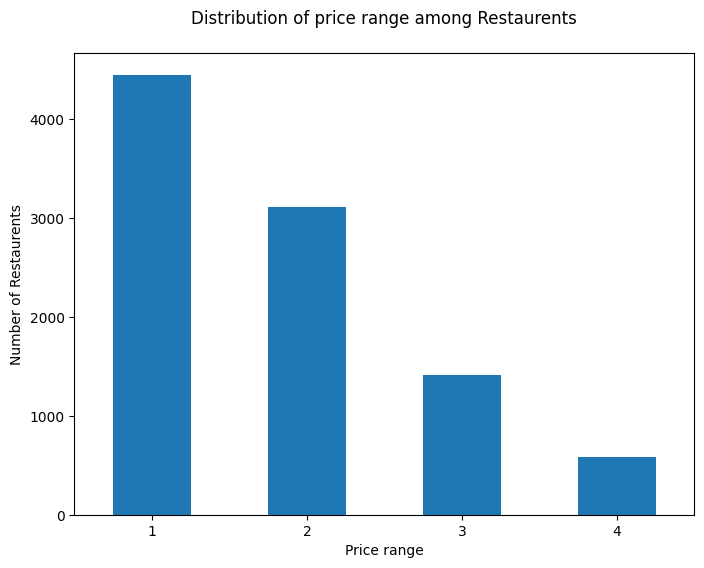

In [130]:
plt.figure(figsize=(8,6))
df["Price range"].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Price range")
plt.ylabel("Number of Restaurents")
plt.title("Distribution of price range among Restaurents\n")
plt.xticks(rotation= 0)
plt.show()

## 2. Percentage Calculation of restaurents in each price range category

In [131]:
price_range = df['Price range'].value_counts()
price_range

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [132]:
# percentage =  (price_range/total_restaurents)*100

print(f"Percentage of restaurents in each price range category: \n {percentage}%")

Percentage of restaurents in each price range category: 
 Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64%


# LEVEL_1 Task_4 (Online Delivery)

## 1. Determine the percentage of restaurants that offer online delivery. 

In [133]:
total_restaurents = len(df)
Online_delivery_res = df[df['Has Online delivery'] == 1]
Percentage_Online_del = (len(Online_delivery_res) / total_restaurents)*100

print(f"The percentage of restaurants offering online delivery is :\n {Percentage_Online_del:.2f}%")

The percentage of restaurants offering online delivery is :
 0.00%


## 2.  Compare the average ratings of restaurants with and without online delivery.

In [134]:
online_del = df[df['Has Online delivery']=='No']
avg_w_od = Online_delivery_res['Aggregate rating'].mean()
avg_wo_od = online_del['Aggregate rating'].mean()
print('Average rating of restaurents with online delivery: ', avg_w_od)
print('Average rating of restaurents with out online delivery: ', avg_wo_od)

Average rating of restaurents with online delivery:  nan
Average rating of restaurents with out online delivery:  2.465295774647887
